In [1]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3/object


Things that I still have to fix: 
- pressure/temperature
- change size of the box and size of sphere 
- ~~activate AMR~~
- put a sink particle at the center 


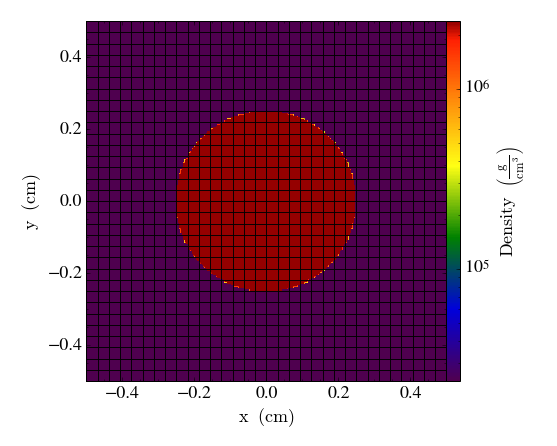


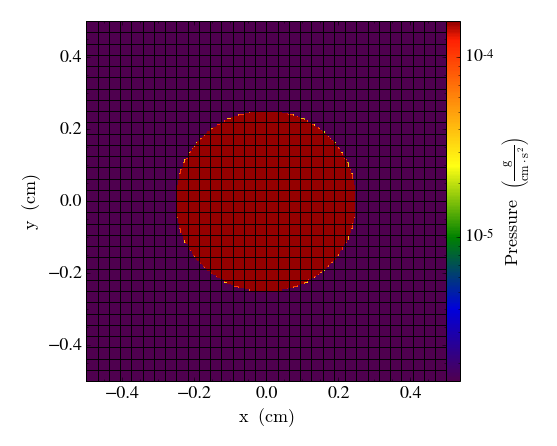


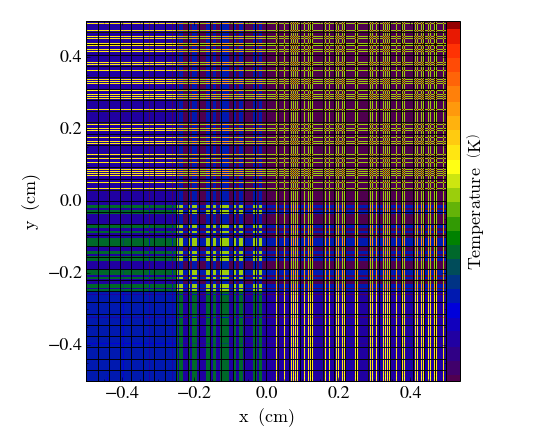

In [6]:
i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()
i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Its not exactly switched around either because the temperature doesn't coreespond to the values that I computed '

http://yt-project.org/doc/examining/loading_data.html
On the data loading page its says: 
    
    Please be careful that the units are correctly utilized; yt assumes cgs.

Changed AMR level =4 to 7 

In [14]:
ls uniform_sphere_*

uniform_sphere_hdf5_chk_0000  uniform_sphere_hdf5_plt_cnt_0000


/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



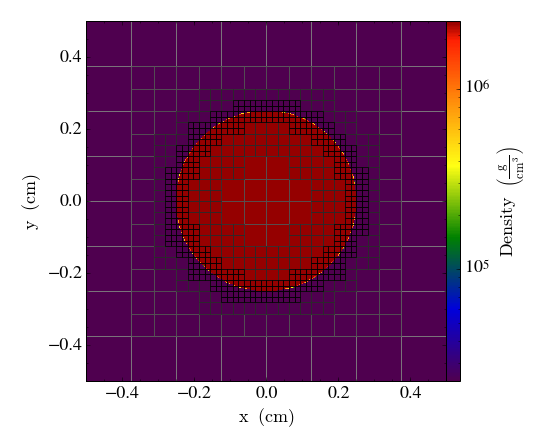

In [3]:
i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Okay AMR seems to be working now so this is good

Checking whether there's a difference in plotting the hdf5_chk file versus the hdf5_plt_cnt file 


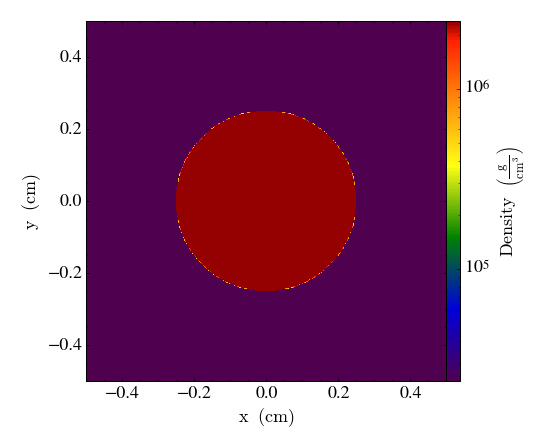

In [8]:
i =0 
ds = yt.load("uniform_sphere_hdf5_plt_cnt_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()


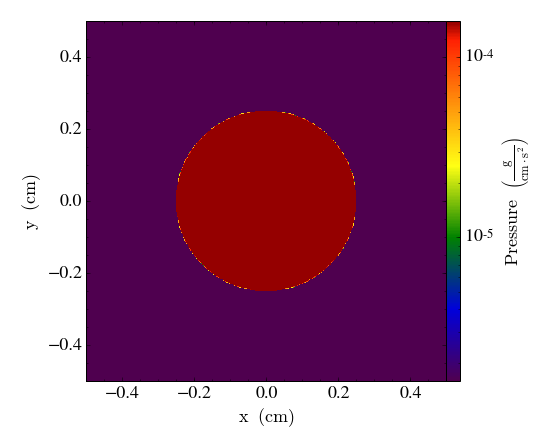

In [11]:
i =0 
ds = yt.load("uniform_sphere_hdf5_plt_cnt_{}".format(str(i).zfill(4)))
# physical_quantity="pres"
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()


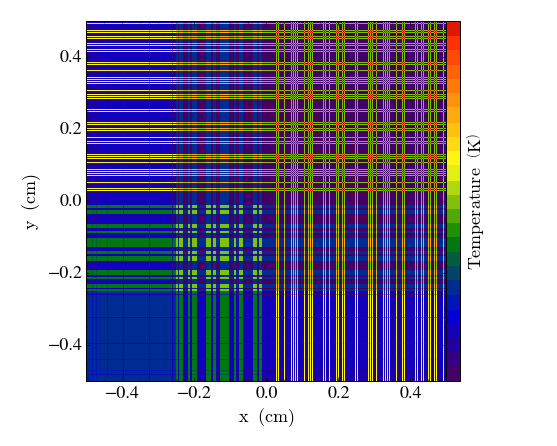

In [12]:
i =0 
ds = yt.load("uniform_sphere_hdf5_plt_cnt_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()

No this looks the same

So we know AMR works now, lets go back to unigrid in order to debug the other stuff 

I'm printing out all the ii,jj,kk so that I could look at how the indexes look like so that I know what rcloud is actually action on '

This is unexpected I suspect it is this inner look that has Nintinv everywhere I dont understand, lets just use the outer loop only to see what happens 

Also I think they are looping through blocks index and not actual length units scales
(they didn't abstract it well like ramses dud ')

Not too sure what K3D and K2D is ...


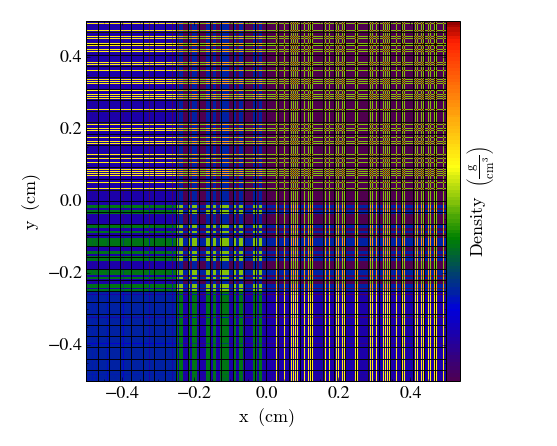

In [17]:
i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Ok so the triple triple loops needs to be there 